Month
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
Name: Sunspots, dtype: float64


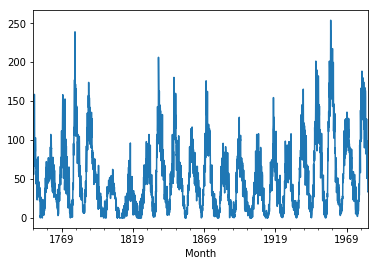

In [3]:
#Load sunspot data
from pandas import Series
from matplotlib import pyplot
series=Series.from_csv("monthly-sunspots.csv",header=0)
print(series.head())
series.plot()
pyplot.show()

Observations: 2820
Training Observations: 1861
Test Observations: 959


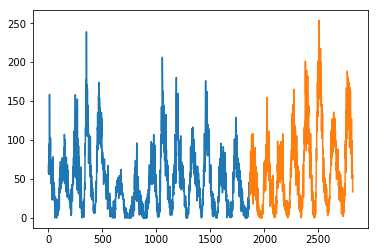

In [4]:
#splitting the data into train and test
X=series.values
train_size=int(len(X)*.66)
train,test =X[0:train_size],X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d'% (len(train)))
print('Test Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train]+[x for x in test])
pyplot.show()